In [1]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.date = pd.to_datetime(df.date)
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df['weekday'] = df.date.dt.day_name()

In [5]:
df = df.set_index('date').sort_index()
df


,temp,weekday
date,,
2010-01-01 00:00:00,47.8,Friday
2010-01-01 01:00:00,47.4,Friday
2010-01-01 02:00:00,46.9,Friday
2010-01-01 03:00:00,46.5,Friday
2010-01-01 04:00:00,46.0,Friday
...,...,...
2010-12-31 19:00:00,50.4,Friday
2010-12-31 20:00:00,49.9,Friday
2010-12-31 21:00:00,49.4,Friday


In [6]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

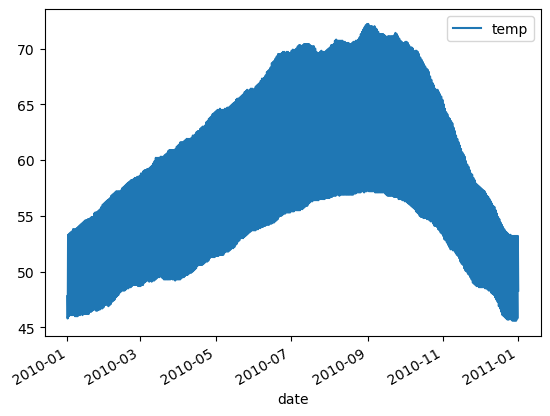

In [7]:
df.plot()

In [8]:
min_df = df.resample('M').min()

<AxesSubplot:xlabel='date'>

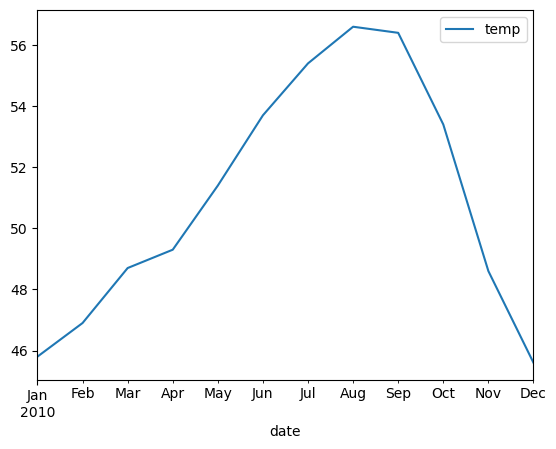

In [9]:
min_df.plot()

In [10]:
max_df = df.resample('M').max()

<AxesSubplot:xlabel='date'>

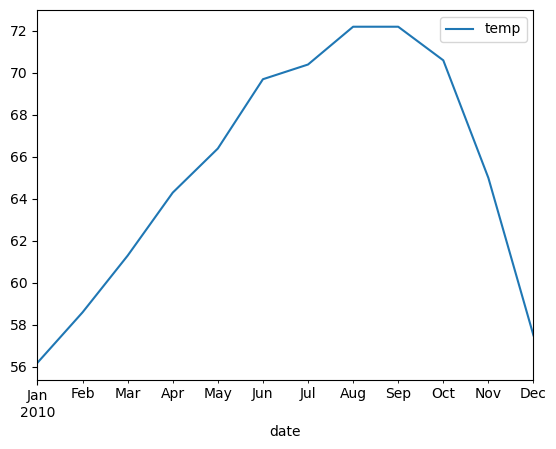

In [11]:
max_df.plot()

In [12]:
average_temp = df.resample('M').mean()

In [13]:
average_temp.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [14]:
average_temp.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

In [15]:
df = df.resample('D').agg(['min', 'max'])
df.shape

(365, 4)

In [19]:
df['avg_variance'] = df[('temp', 'max')] - df[('temp', 'min')]


In [24]:
df.resample('M').mean()['avg_variance'].idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')